In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spa.core import spa
from spa.properties import ThresholdProperty

# Define the file path to the CSV file
file_path = "../data/counts.csv"  

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Process the 'sum_list' column to convert it from a string to a list of integers
df['sum_list'] = df['sum_list'].apply(lambda x: [int(i) for i in x.split(';')])
df

,is_correct,sum_list
0,True,"[-2103, 1235, 15671, -2882, 1466, -86, 391, -3..."
1,True,"[-1741, 313, 3788, -1613, -716, -1570, -7860, ..."
2,True,"[371, 12347, 1538, -2779, 1923, -2114, -4356, ..."
3,True,"[961, 9853, -225, 1323, -2828, 1603, 635, 843,..."
4,True,"[-7062, -5221, 14414, -3123, -2187, -1432, 262..."
...,...,...
1595,True,"[-570, -3553, 3280, -3794, -583, -3481, -2689,..."
1596,False,"[551, 7828, 1451, -4430, 3393, -3385, 1416, 20..."
1597,True,"[-31, -1863, 1628, 2772, 1826, 4547, -5171, -5..."
1598,True,"[765, 8, 728, -4552, 16036, -443, 1539, -806, ..."


In [19]:
# Now I want to normalize all of these sum_lists and put it into a new column called 'normalized_sum_list'
df['normalized_sum_list'] = df['sum_list'].apply(lambda x: list(sorted([i/np.linalg.norm(x) for i in x]).__reversed__()))
df

,is_correct,sum_list,normalized_sum_list
0,True,"[-2103, 1235, 15671, -2882, 1466, -86, 391, -3...","[0.8287782189483501, 0.2729980962421915, 0.077..."
1,True,"[-1741, 313, 3788, -1613, -716, -1570, -7860, ...","[0.8014458726165504, 0.16919561753728435, 0.16..."
2,True,"[371, 12347, 1538, -2779, 1923, -2114, -4356, ...","[0.8099415687125946, 0.18334710330863382, 0.12..."
3,True,"[961, 9853, -225, 1323, -2828, 1603, 635, 843,...","[0.7732786898968518, 0.17611259313189237, 0.12..."
4,True,"[-7062, -5221, 14414, -3123, -2187, -1432, 262...","[0.7832853855331917, 0.16590608311591745, 0.14..."
...,...,...,...
1595,True,"[-570, -3553, 3280, -3794, -583, -3481, -2689,...","[0.8122494281690115, 0.22476825482108814, 0.12..."
1596,False,"[551, 7828, 1451, -4430, 3393, -3385, 1416, 20...","[0.7150763301197381, 0.3828739748411293, 0.165..."
1597,True,"[-31, -1863, 1628, 2772, 1826, 4547, -5171, -5...","[0.7938581764207162, 0.22638276125337073, 0.13..."
1598,True,"[765, 8, 728, -4552, 16036, -443, 1539, -806, ...","[0.8317036164699974, 0.17862230326282558, 0.08..."


In [20]:
# Now I want to average the normalized sum lists for correct and incorrect trials
correct_trials = df[df['is_correct'] == True]
incorrect_trials = df[df['is_correct'] == False]

correct_avg = np.mean(correct_trials['normalized_sum_list'].tolist(), axis=0)
incorrect_avg = np.mean(incorrect_trials['normalized_sum_list'].tolist(), axis=0)

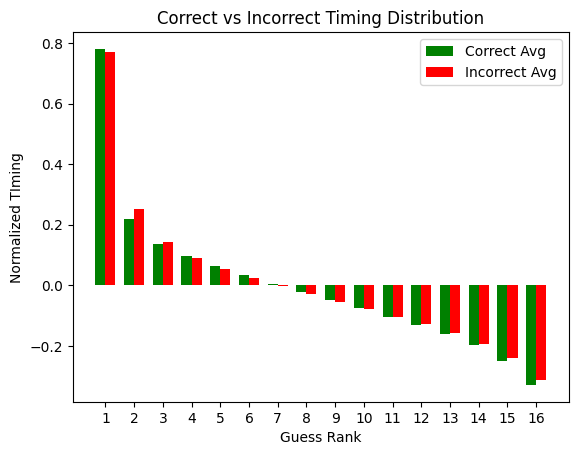

In [24]:
# Now plot these distribution as side by side bar charts

# Define the x-axis indices
x = np.arange(1, 17)
# Create the figure and axes
fig, ax = plt.subplots()

# Width of the bars
bar_width = 0.35

# Plot the bars
bars1 = ax.bar(x - bar_width/2, correct_avg, bar_width, label='Correct Avg', color='g')
bars2 = ax.bar(x + bar_width/2, incorrect_avg, bar_width, label='Incorrect Avg', color='r')

# Label the x and y axes
ax.set_xlabel('Guess Rank')
ax.set_ylabel('Normalized TIming')
ax.set_title('Correct vs Incorrect Timing Distribution')

# Set the ticks on the x-axis
ax.set_xticks(x)
ax.set_xticklabels(x)

# Add a legend
ax.legend()

# Save the plot
plt.savefig('../figures/correct_vs_incorrect_timing_distribution.png')


